In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('data/train_processed.csv')
train_selected = pd.read_csv('data/train_selected.csv')

In [3]:
train.head()

,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,...,parentesco7-max,parentesco8-min,parentesco8-max,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco10-min,parentesco10-max,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco12-min,parentesco12-max,parentesco12-sum,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-std,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-std,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-std,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel6-min,instlevel6-max,instlevel7-min,instlevel7-max,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-std,instlevel9-min,instlevel9-max,mobilephone-min,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_,inst-max,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_,female-head,Target,idhogar
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.080732,0.000,0.476190,0.00000,0.270270,0.137931,0.2,0.0,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.476190,0.476190,0.086207,0.233285,0.000000,0.457447,0.316456,0.070423,0.385782,0.000000,0.375,0.250000,0.000,0.332226,0.314637,0.042686,0.373198,0.000000,0.179402,0.285291,0.000000,0.5,0.045455,0.0,0.0,0.0,4.0,21eb7fcc1
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.057362,1.000,0.571429,0.00000,0.324324,0.137931,0.3,0.0,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.571429,0.571429,0.103448,0.233285,0.000000,0.712766,0.620253,0.138028,0.385782,0.000000,0.875,0.250000,0.000,0.255864,0.242318,0.032875,0.373198,0.000000,0.268657,0.285291,0.000000,1.0,0.090909,0.0,0.0,0.0,4.0,0e5d7a658
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000,0.000000,0.52381,0.297297,0.051724,0.7,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.523810,0.523810,0.094828,0.233285,0.000000,0.978723,0.936709,0.208451,0.385782,0.000000,0.500,0.250000,0.000,0.170807,0.161765,0.021946,0.373198,0.000000,0.111801,0.2852

In [4]:
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [5]:
X_train = train.drop(columns=["Target",'idhogar'])
X_selected = train_selected.drop(columns=["Target",'idhogar'])
y_train = train['Target']

In [6]:
rf = RandomForestClassifier(n_estimators = 100, random_state=10, n_jobs = 3)

In [7]:
cv_scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring=scorer, n_jobs = -1)
print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')

10 Fold CV Score: 0.34386 with std: 0.03134


In [8]:
cv_scores = cross_val_score(rf, X_selected, y_train, cv = 10, scoring=scorer, n_jobs = -1)
print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')

10 Fold CV Score: 0.36297 with std: 0.04079


In [9]:
train.shape

(2973, 228)

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

## Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 222    0    0    0]
 [   0  442    0    0]
 [   0    0  355    0]
 [   0    0    0 1954]]


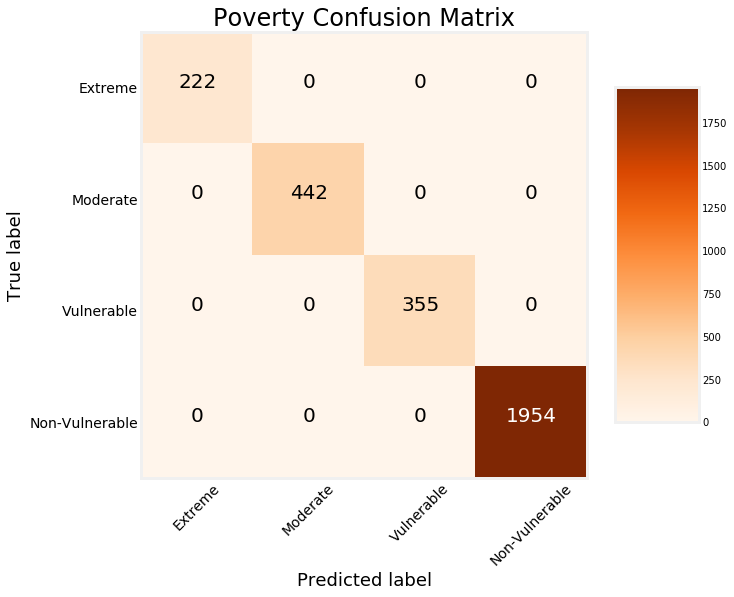

In [12]:
pred = rf.predict(X_train)
cm = confusion_matrix(y_train, pred)

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

# Features importance

## by scikit-learn

In [13]:
df = pd.DataFrame(data={"features": X_train.columns.values, "importance":rf.feature_importances_})
df.sort_values(
    by="importance", ascending=False).head(10)

,features,importance
70,meaneduc,0.024881
206,age-max,0.020916
205,age-min,0.020913
98,phones-per-capita,0.020488
208,age-std,0.019651
215,escolari/age-sum,0.019419
218,inst/age-max,0.018953
201,escolari-max,0.018825
67,dependency,0.018744
213,escolari/age-min,0.018486


## by eli5

In [14]:
p_train, p_test, l_train, l_test = train_test_split(X_train, y_train, random_state=42)

In [15]:
rf.fit(p_train, l_train)
perm = PermutationImportance(rf).fit(p_test, l_test)


In [16]:
eli5.show_weights(perm, feature_names=X_train.columns.values)

Weight,Feature
0.0094 ± 0.0145,dependency
0.0073 ± 0.0022,r4h2
0.0062 ± 0.0121,walls+roof+floor
0.0062 ± 0.0027,warning
0.0062 ± 0.0013,escolari-min
0.0059 ± 0.0040,roof
0.0054 ± 0.0017,instlevel8-max
0.0054 ± 0.0017,epared2
0.0051 ± 0.0026,elimbasu1
0.0051 ± 0.0067,hogar_nin


## Investigation of the confusion matrix
* 1 = extreme poverty 
* 2 = moderate poverty 
* 3 = vulnerable households 
* 4 = non vulnerable households

Confusion matrix, without normalization
[[ 11  13   2  32]
 [  3  35   2  76]
 [  2   8   5  75]
 [  4  13   3 460]]


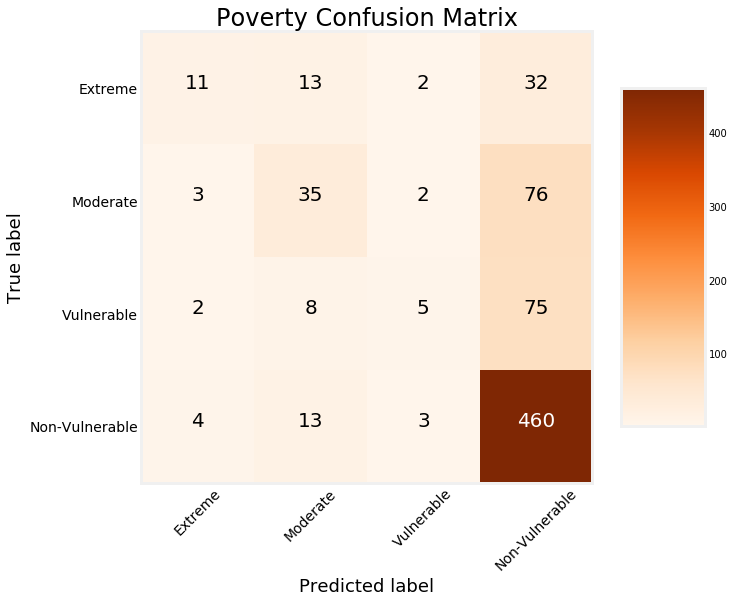

In [17]:
p_train, p_test, l_train, l_test = train_test_split(X_train, y_train, random_state=42)
rf.fit(p_train, l_train)
pred = rf.predict(p_test)
cm = confusion_matrix(l_test, pred)

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

In [18]:
test_results = pd.DataFrame(data=l_test)
test_results['Predicted'] = pred

In [19]:
def get_indexes(test_results, true_label, pred_label):
    return test_results[(test_results['Target']==true_label) & (test_results['Predicted']==pred_label)].index

def get_cofused_entries(df, test_results, true_label, pred_label):
    return df.loc[get_indexes(test_results, true_label, pred_label)]

In [20]:
nonvul_as_extreme = get_cofused_entries(p_test, test_results, 4, 1)
extreme_as_nonvul = get_cofused_entries(p_test, test_results, 1, 4)

In [21]:
nonvul_as_extreme.T

,2684,2004,2822,2872
hacdor,0.000000,0.000000,0.000000,0.000000
hacapo,0.000000,0.000000,0.000000,0.000000
v14a,1.000000,1.000000,1.000000,1.000000
refrig,1.000000,1.000000,1.000000,1.000000
paredblolad,0.000000,1.000000,1.000000,0.000000
paredzocalo,1.000000,0.000000,0.000000,0.000000
paredpreb,0.000000,0.000000,0.000000,0.000000
pisocemento,1.000000,0.000000,1.000000,1.000000
pareddes,0.000000,0.000000,0.000000,0.000000
paredmad,0.000000,0.000000,0.000000,1.000000


In [22]:
extreme_as_nonvul

,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,...,parentesco6-sum,parentesco7-min,parentesco7-max,parentesco8-min,parentesco8-max,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco10-min,parentesco10-max,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco12-min,parentesco12-max,parentesco12-sum,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-std,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-std,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-std,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel6-min,instlevel6-max,instlevel7-min,instlevel7-max,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-std,instlevel9-min,instlevel9-max,mobilephone-min,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_,inst-max,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_,female-head
52,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.074358,0.187500,0.380952,0.000000,0.256757,0.252874,0.4,0.2,0.125,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.2,0.632456,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.523810,0.163793,0.357619,0.523810,0.021277,0.139241,0.138028,0.313515,0.290323,0.500,0.344601,0.500,0.000000,0.513185,0.124008,0.422204,0.541872,0.354680,0.310491,0.358621,0.5,0.227273,0.0,0.0,0.0
2546,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.250000,0.380952,0.000000,0.337838,0.482759,0.1,0.0,0.250,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.142857,0.816497,0.0,1.0,0.2,0.816497,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.285714,0.523810,0.215517,0.169477,0.238095,0.191489,0.759494,0.397183,0.729060,0.645161,0.500,0.176777,0.250,0.136054,0.826797,0.148476,0.666534,0.736961,0.571429,0.487365,0.495238,0.5,0.136364,0.0,0.0,0.0
1110,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.125000,0.095238,0.000000,0.090090,0.137931,0.5,0.0,0.125,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.816497,0.0,1.0,0.142857,0.707107,0.0,0.0,0.0,0.000000,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.095238,0.523810,0.181034,0.287692,0.428571,0.180851,0.632911,0.425352,0.56

In [23]:
import shap
import numpy.core.multiarray as multiarray
from IPython.display import display, HTML

shap.initjs()

def plot_influence_on_pred(df, shap_values, expected_value, index):
    display(HTML("<h1>What influenced prediction for {}th sample</h1>".format(index+1)))
    display(HTML("<h2>Prediction of class 4 (Non-vulnerable) probability"))
    display(shap.force_plot(expected_value[3], shap_values[3][index], df.iloc[index,:]))
#     display(HTML("<h2>Prediction of class 3 (Vulnerable) probability"))
#     display(shap.force_plot(expected_value[2], shap_values[2][index], df.iloc[index,:]))
#     display(HTML("<h2>Prediction of class 2 (Moderate vulnerability) probability"))
#     display(shap.force_plot(expected_value[1], shap_values[1][index], df.iloc[index,:]))
    display(HTML("<h2>Prediction of class 1 (Extreme vulnerability) probability"))
    display(shap.force_plot(expected_value[0], shap_values[0][index], df.iloc[index,:]))

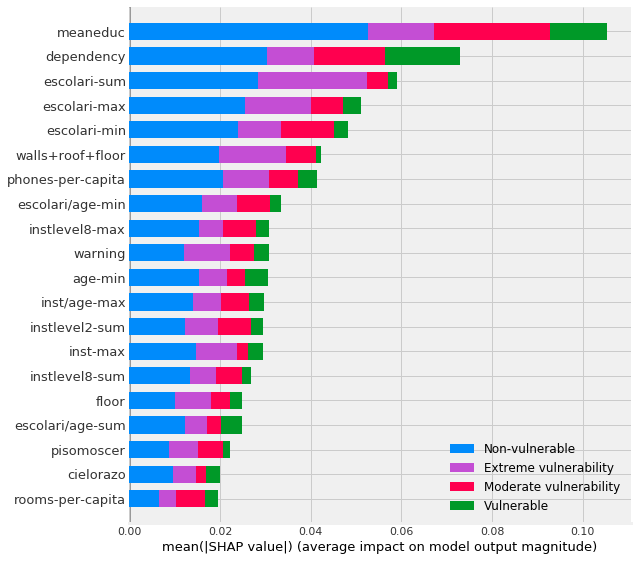

In [24]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(nonvul_as_extreme)
shap.summary_plot(shap_values, nonvul_as_extreme, class_names=['Extreme vulnerability', 'Moderate vulnerability', 'Vulnerable', 'Non-vulnerable'])
expected_value = explainer.expected_value

In [25]:
def sample_and_explain(df, number_of_samples, random_state, shap_values, expected_value):
    for sample_id in df.sample(number_of_samples, random_state=random_state).index.values:
        index = df.index.get_loc(sample_id)
        plot_influence_on_pred(df, shap_values, expected_value, index)    
        
sample_and_explain(nonvul_as_extreme, 4, 42, shap_values, expected_value)

-----------------------------------------------------------------

## Extreme as Non-Vulnerable confusion

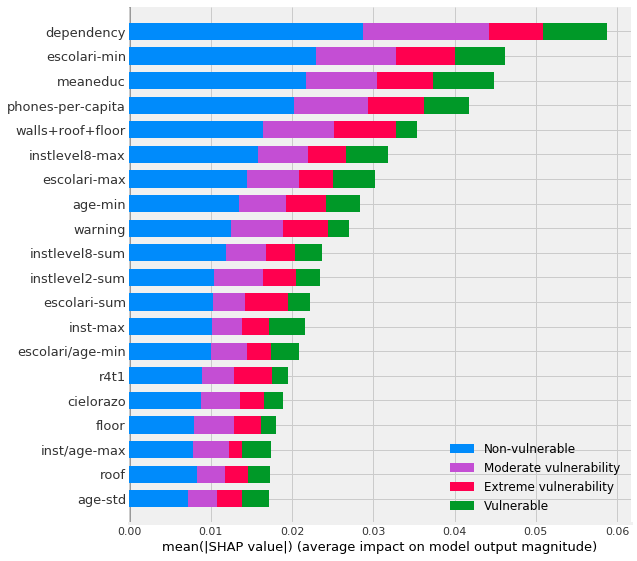

In [26]:
shap_values = explainer.shap_values(extreme_as_nonvul)
shap.summary_plot(shap_values, extreme_as_nonvul, class_names=['Extreme vulnerability', 'Moderate vulnerability', 'Vulnerable', 'Non-vulnerable'])
expected_value = explainer.expected_value
sample_and_explain(extreme_as_nonvul, 4, 42, shap_values, expected_value)